In [1]:
import os
import pickle

# Functions from other notebook file.
from ipynb.fs.full.shared_functions_server import *

2021-12-04 12:48:30.427457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:30.464534: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:30.464746: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:30.465472: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

In [2]:
# Move one directory back to the project root.
os.chdir("..")

In [3]:
# Suppress tensorflow log messages.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [4]:
# GLOBALS
BATCH_SIZE = 128

IMAGE_HEIGHT = 100
IMAGE_WIDTH = 100
IMAGE_CHANNELS = 1

CATEGORIES = 10 # represents digits 0-9
DIMENSIONS = 4

---
## Evaluate Model History

In [9]:
# Open serialized training history data for VGG-16 model.
with open(r'model-info/mobile-training', 'rb') as input_file:
            history = pickle.load(input_file, encoding='bytes')

In [23]:
validation_score = max(history['val_accuracy'])
validation_score = round(validation_score * 100, 2)
print('Validation accuracy (highest): {}%'.format(validation_score))

training_score = max(history['accuracy'])
training_score = round(training_score * 100, 2)
print('Training accuracy (highest): {}%'.format(training_score))

Validation accuracy (highest): 97.14%
Training accuracy (highest): 97.58%


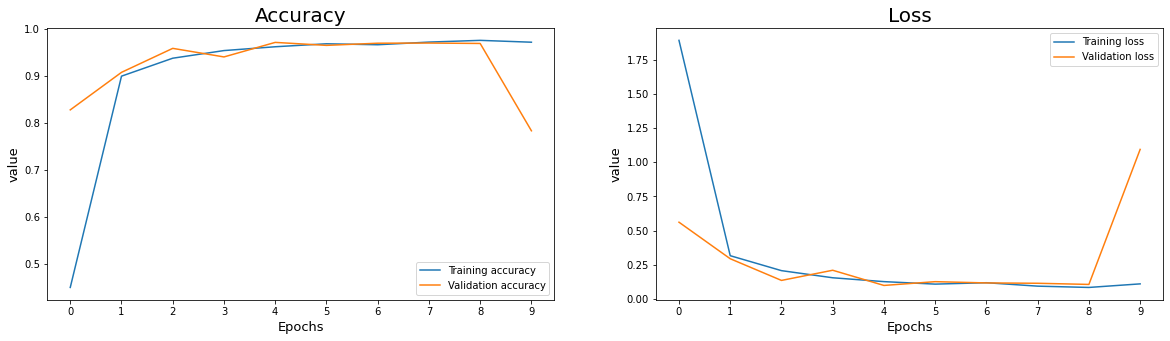

In [6]:
# Plot the training history.
title_font = 20
axis_font = 13

figure, axes = pyplot.subplots(1, 2, figsize=(20, 5))

axes[0].set_xticks(range(0, 11, 1))
axes[0].plot(history['accuracy'], label='Training accuracy')
axes[0].plot(history['val_accuracy'], label='Validation accuracy')
axes[0].set_title('Accuracy', fontsize=20)
axes[0].set_xlabel('Epochs', fontsize=axis_font)
axes[0].set_ylabel('value', fontsize=axis_font)
axes[0].legend() 

axes[1].set_xticks(range(0, 11, 1))
axes[1].plot(history['loss'], label='Training loss')
axes[1].plot(history['val_loss'], label='Validation loss')
axes[1].set_title('Loss', fontsize=20)
axes[1].set_xlabel('Epochs', fontsize=axis_font)
axes[1].set_ylabel('value', fontsize=axis_font)
axes[1].legend()

---
## Evaluate Model Performance

In [7]:
model = models.load_model('model-info/mobile')
model.summary()

2021-12-04 12:48:31.156494: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:31.156716: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:31.156864: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:31.157062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-04 12:48:31.157214: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from S

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 3, 3, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 10)                92170     
                                                                 
Total params: 3,321,034
Trainable params: 3,299,146
Non-trainable params: 21,888
_________________________________________________________________
